In [2]:
# Need to export the data on mobile. It comes in a .txt file
# I emailed it to myself. 

In [3]:
%pip install emoji -q
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.



In [4]:
%pip install wordcloud -q
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# sender_list['sender_icons'] = [
#     "\U0001F528","\U0001F37A","\U0001F37C","\U0001F37B","\U0001F528","\U0001F596","\U0001F3D0","\U0001F3BD","\U0001F3AE"
# ,"\U0001F4E3","\U0001F52A","\U0001F6EC","\U0001F985","\U0001F6F8","\U0001F4BC","\U0001F600","\U0001F6F5","\U0001F9EA", "\U0001F9CA", None]

In [742]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings
import random

%matplotlib inline
warnings.filterwarnings('ignore')

In [743]:
chat_file = open("C:\\Users\\oriordanro\\Downloads\\WhatsApp Chat with lads.txt", encoding="utf-8")

In [744]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [745]:
data = []
conversation = "C:\\Users\\oriordanro\\Downloads\\WhatsApp Chat with lads.txt"
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [746]:
# Converting the message text to lower
# Adding different date groups

df = pd.DataFrame(data, columns=["Date", 'Time', 'Sender', 'Message'])
df["Timestamp"] = pd.to_datetime(df["Date"] + ' ' + df["Time"])
df['Date'] = pd.to_datetime(df['Date'])
df['Message'] = df['Message'].astype(str).str.lower()
df['hour'] = df['Timestamp'].dt.strftime('%H:00')
df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['date'] = df['Date'].apply(lambda x: x.date())


df.head(3)

,Date,Time,Sender,Message,Timestamp,hour,day,month,year,date
0,2022-10-15,22:49,None,"king 🇺🇸 created group ""bse""",2022-10-15 22:49:00,22:00,Sat,Oct,2022,2022-10-15
1,2022-10-16,11:24,None,paul added you,2022-10-16 11:24:00,11:00,Sun,Oct,2022,2022-10-16
2,2022-10-16,11:26,None,you're now an admin,2022-10-16 11:26:00,11:00,Sun,Oct,2022,2022-10-16


In [747]:
# Removing sender name and replacing them with random int

sender_list = [i for i in df['Sender'].unique()]
sender_list = pd.DataFrame(sender_list, columns = ['Sender'])
sender_list.sort_values(by = 'Sender', inplace = True)
sender_list.reset_index(inplace = True)
sender_list.drop(['index'], axis = 1, inplace = True)
sender_list['sender_randint'] = [ random.randint(1,1000) for i in sender_list.index]

df = df.merge(sender_list, how='left', on = 'Sender')
df.drop('Sender', axis = 1, inplace = True)

df.head()

,Date,Time,Message,Timestamp,hour,day,month,year,date,sender_randint
0,2022-10-15,22:49,"king 🇺🇸 created group ""bse""",2022-10-15 22:49:00,22:00,Sat,Oct,2022,2022-10-15,755
1,2022-10-16,11:24,paul added you,2022-10-16 11:24:00,11:00,Sun,Oct,2022,2022-10-16,755
2,2022-10-16,11:26,you're now an admin,2022-10-16 11:26:00,11:00,Sun,Oct,2022,2022-10-16,755
3,2022-10-16,13:38,"now king, are you happy now ?",2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,155
4,2022-10-16,13:38,king's shares in meta 📈🚀,2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,155


In [748]:
# Using a copy of the original data frame everytime, to avoid loss of data!

df1 = df.copy()     

df1.head()

,Date,Time,Message,Timestamp,hour,day,month,year,date,sender_randint
0,2022-10-15,22:49,"king 🇺🇸 created group ""bse""",2022-10-15 22:49:00,22:00,Sat,Oct,2022,2022-10-15,755
1,2022-10-16,11:24,paul added you,2022-10-16 11:24:00,11:00,Sun,Oct,2022,2022-10-16,755
2,2022-10-16,11:26,you're now an admin,2022-10-16 11:26:00,11:00,Sun,Oct,2022,2022-10-16,755
3,2022-10-16,13:38,"now king, are you happy now ?",2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,155
4,2022-10-16,13:38,king's shares in meta 📈🚀,2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,155


# Message Count

## Sender message count

In [749]:
sender_message_count = df1.groupby("sender_randint").count()["Message"].sort_values(ascending = False)
print(sender_message_count)

sender_randint
865    146
155    118
513    116
192     73
642     54
130     39
175     29
763     29
923     26
489     24
755     22
548     17
667     17
566     13
383      9
445      8
590      6
12       5
332      3
150      3
Name: Message, dtype: int64


## Daily message Count

In [750]:
daily_message_count = df1.groupby("Date").count()["Message"]
print(daily_message_count)

Date
2022-10-15      1
2022-10-16    156
2022-10-17      3
2022-10-18      1
2022-10-19      7
2022-10-20      9
2022-10-22    133
2022-10-23     32
2022-10-24     18
2022-10-25      7
2022-10-26      4
2022-10-29      2
2022-10-30     32
2022-10-31     20
2022-11-01     18
2022-11-03      8
2022-11-06      3
2022-11-07      4
2022-11-09      2
2022-11-10      3
2022-11-12    192
2022-11-13     11
2022-11-15      6
2022-11-18     53
2022-11-20      1
2022-11-24      1
2022-11-25      3
2022-11-26     10
2022-11-27     16
2022-11-30      1
Name: Message, dtype: int64


## Hour Message Count

In [751]:
hour_message_count = df1.groupby("hour").count()["Message"]
print(hour_message_count)

hour
00:00     27
01:00      9
02:00     13
03:00      5
05:00      2
06:00      1
08:00      5
09:00      7
10:00      8
11:00     32
12:00     12
13:00     23
14:00    192
15:00    183
16:00     67
17:00     23
18:00     22
19:00     42
20:00     15
21:00     28
22:00     24
23:00     17
Name: Message, dtype: int64


In [752]:
# Removing unnecessary words

removed_list = ["the", "jpg" , "file", "attached", "img", "WA0000", "mp4", "VID", "Media", "omitted"
                 , "omitted>", "<media", ",", ".", "ya", "ye", "?", "yeah", "https", "s"] + list(STOPWORDS)

# Sentiment Analystis

In [753]:
# NLTK (VADER)
# TextBlob
# Flair

## NLTK (VADER)

In [754]:
# https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

In [755]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [756]:
import nltk

In [757]:
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_p

True

In [758]:
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

In [759]:
stopwords = removed_list + nltk.corpus.stopwords.words("english")

In [761]:
df2_messages = df1.copy()

In [762]:
df2_messages = pd.DataFrame(df2_messages)
df2_messages = df2_messages[df2_messages["Message"] != "<media omitted>"] # removing media omitted

In [763]:
regexp = RegexpTokenizer('\w+')

df2_messages['text_token']=df2_messages["Message"].apply(regexp.tokenize)

In [764]:
# removing stop words
df2_messages['text_token'] = df2_messages['text_token'].apply(lambda x: [item for item in x if item not in removed_list])

# removing infrequent words
df2_messages['text_string'] = df2_messages['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [765]:
# create a list of all words
all_words = ' '.join([word for word in df2_messages['text_string']])

# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [766]:
df2_messages['text_string_fdist'] = df2_messages['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [676]:
from nltk.stem import WordNetLemmatizer

In [677]:
wordnet_lem = WordNetLemmatizer()

df2_messages['text_string_lem'] = df2_messages['text_string_fdist'].apply(wordnet_lem.lemmatize)
df2_messages.head()

,Date,Time,Message,Timestamp,hour,day,month,year,date,sender_randint,text_token,text_string,text_string_fdist,text_string_lem
0,2022-10-15,22:49,"king 🇺🇸 created group ""bse""",2022-10-15 22:49:00,22:00,Sat,Oct,2022,2022-10-15,557,"[king, created, group, bse]",king created group bse,king created group bse,king created group bse
1,2022-10-16,11:24,paul added you,2022-10-16 11:24:00,11:00,Sun,Oct,2022,2022-10-16,557,"[paul, added]",paul added,paul added,paul added
2,2022-10-16,11:26,you're now an admin,2022-10-16 11:26:00,11:00,Sun,Oct,2022,2022-10-16,557,[admin],admin,admin,admin
3,2022-10-16,13:38,"now king, are you happy now ?",2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,14,"[king, happy]",king happy,king happy,king happy
4,2022-10-16,13:38,king's shares in meta 📈🚀,2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,14,"[king, shares, meta]",king shares meta,king shares meta,king shares meta


In [678]:
df2_messages['is_equal']= (df2_messages['text_string_fdist']==df2_messages['text_string_lem'])
df2_messages.is_equal.value_counts()

True     694
False      3
Name: is_equal, dtype: int64

In [679]:
# Frequency distributions
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oriordanro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [680]:
all_words_lem = ' '.join([word for word in df2_messages['text_string_lem']])

In [681]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

In [682]:
analyzer = SentimentIntensityAnalyzer()

In [737]:
# Polarity scores
df2_messages['polarity'] = df2_messages['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

In [738]:
df2_messages = pd.concat(
    [df2_messages
     ,df2_messages['polarity'].apply(pd.Series)], axis=1)

In [687]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df2_messages['sentiment'] = df2_messages['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df2_messages.head(4)

,Date,Time,Message,Timestamp,hour,day,month,year,date,sender_randint,...,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,2022-10-15,22:49,"king 🇺🇸 created group ""bse""",2022-10-15 22:49:00,22:00,Sat,Oct,2022,2022-10-15,557,...,king created group bse,king created group bse,king created group bse,True,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.0,0.600,0.400,0.2500,positive
1,2022-10-16,11:24,paul added you,2022-10-16 11:24:00,11:00,Sun,Oct,2022,2022-10-16,557,...,paul added,paul added,paul added,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,neutral
2,2022-10-16,11:26,you're now an admin,2022-10-16 11:26:00,11:00,Sun,Oct,2022,2022-10-16,557,...,admin,admin,admin,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,neutral
3,2022-10-16,13:38,"now king, are you happy now ?",2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,14,...,king happy,king happy,king happy,True,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.0,0.213,0.787,0.5719,positive


### Total compound by day

In [690]:
tot_compound_day = df2_messages.groupby("day").sum("compound")['compound'].sort_values(ascending = False)

### Average compound per day 

In [691]:
avg_compound_day = df2_messages.groupby("day").mean("compound")['compound'].sort_values(ascending = False)

### Total compound by sender

Text(0.5, 1.0, 'Compound Total by Sender')

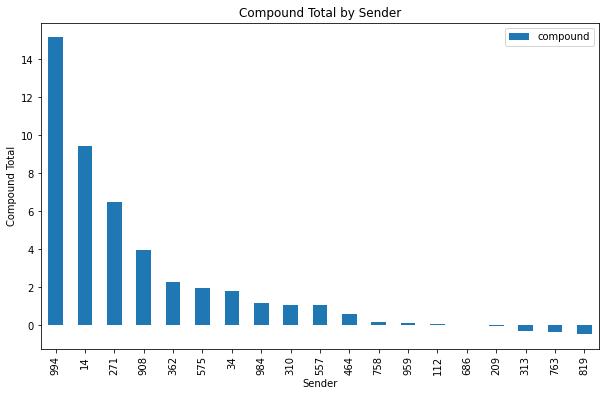

In [736]:
tot_comp_sender = pd.DataFrame(df2_messages.groupby("sender_randint").sum("compound")['compound'].sort_values(ascending = False))

# Total Compound Sender
tot_comp_sender.plot(kind = 'bar'
                    , stacked=True
                    , figsize = (10,6)
            )

plt.xlabel(xlabel = None)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Compound Total')
plt.xlabel('Sender')
plt.title('Compound Total by Sender')

### Average compound per sender 

In [693]:
sender_message_count = pd.DataFrame(sender_message_count)

In [694]:
avg_comp_sender = pd.DataFrame(df2_messages.groupby("sender_randint").mean("compound")['compound'].sort_values(ascending = False))
avg_comp_total_mess_count = avg_comp_sender.merge(sender_message_count, how = 'left', on = 'sender_randint')

### Sentiment count by Sender

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Message Count'),
 Text(0.5, 1.0, 'Message Count by Sentiment')]

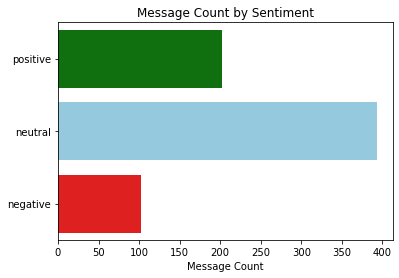

In [708]:
# Number of tweets 
g = sns.countplot(y='sentiment', 
             data=df2_messages, 
             palette=['green','skyblue','red'])

g.set(ylabel= None
     ,xlabel = 'Message Count'
     ,title = 'Message Count by Sentiment'
     )

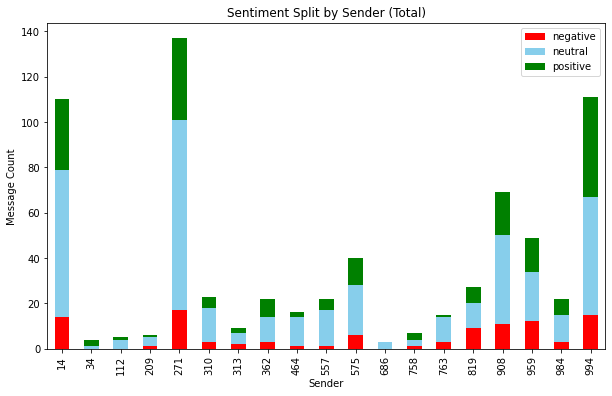

In [735]:
sentiment_count_sender = df2_messages.reset_index().groupby(["sender_randint","sentiment"]).count().sort_values(ascending = True,by=["sender_randint","sentiment","index",])["index"]

sentiment_count_sender.unstack().plot(kind='bar'
                    , stacked=True
                    , color=['red', 'skyblue', 'green']
                    , figsize = (10,6)
                    , title = 'Sentiment Split by Sender (Total)'
            )

plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.legend(bbox_to_anchor=(1,1))


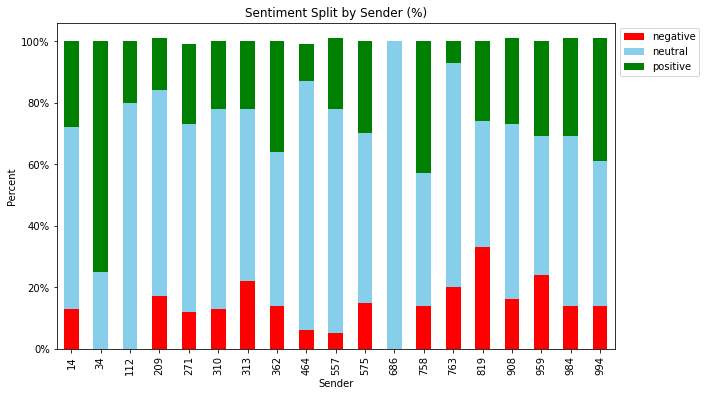

In [734]:
senetiment_split_perc = df2_messages.reset_index().groupby(["sender_randint","sentiment"]).count().sort_values(ascending = True,by=["sender_randint","sentiment","index",])["index"]
# test_2['total'] = test_2.groupby("Sender").sum()
senetiment_split_perc = pd.DataFrame(data = senetiment_split_perc, columns = ['index'])
senetiment_split_perc.rename(columns = {"index": "message_count"}, inplace = True)
senetiment_split_perc_2 = senetiment_split_perc.groupby('sender_randint').sum('message_count')
senetiment_split_perc_2 = senetiment_split_perc.merge(senetiment_split_perc_2, how = 'left', left_index = True, right_index = True)
senetiment_split_perc_2.rename(columns = {"message_count_x": "message_count"
                        ,"message_count_y": "total_messages"}, inplace = True)
senetiment_split_perc_2['%_of_total'] = round(senetiment_split_perc_2['message_count'] *1.0/ senetiment_split_perc_2['total_messages'],2)


senetiment_split_perc_2.unstack().plot(kind='bar'
                    ,stacked = True
                    , color=['red', 'skyblue', 'green']
                    , figsize = (10,6)
                    , y = "%_of_total"  
                    , title = "Sentiment Split by Sender (%)"
            )

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.ylabel('Percent')
plt.xlabel('Sender')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


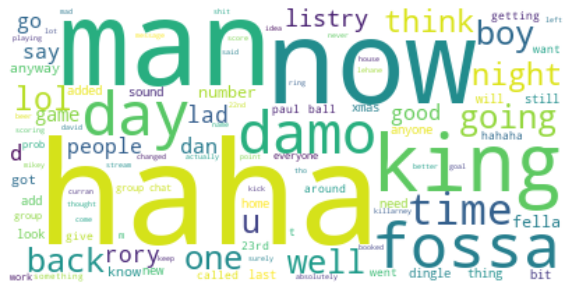

In [733]:
### Word Cloud of mostly used word in the groupchat

removed_list = ["the", "jpg" , "file", "attached", "img", "WA0000", "mp4", "VID", "Media", "omitted"
                 , "omitted>", "<media", ",", ".", "ya", "ye", "?", "yeah", "https", "s"] + list(STOPWORDS)

text = " ".join(review for review in df1.Message)
wordcloud = WordCloud(stopwords = removed_list
                      ,background_color="white"
                      ,max_words = 100
                      ,prefer_horizontal=1
                     ).generate(text)

  ### Display the generated image:
plt.figure( figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Flair

In [643]:
# https://github.com/jeremydiba/sentiment-analysis-medium/blob/main/sentiment%20playground.ipynb

In [644]:
pip install flair

In [645]:
from flair.models import TextClassifier
from flair.data import Sentence
from datetime import datetime
import time

In [646]:
# Create a copy of the DF for Flair 

df3_messages = df1.copy()

In [647]:
df3_messages = pd.DataFrame(df2_messages)
df3_messages = df2_messages[df2_messages["Message"] != "<media omitted>"] # removing media omitted
df3_messages.head()

,Date,Time,Message,Timestamp,hour,day,month,year,date,sender_randint,...,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,2022-10-15,22:49,"king 🇺🇸 created group ""bse""",2022-10-15 22:49:00,22:00,Sat,Oct,2022,2022-10-15,557,...,king created group bse,king created group bse,king created group bse,True,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.0,0.600,0.400,0.2500,positive
1,2022-10-16,11:24,paul added you,2022-10-16 11:24:00,11:00,Sun,Oct,2022,2022-10-16,557,...,paul added,paul added,paul added,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,neutral
2,2022-10-16,11:26,you're now an admin,2022-10-16 11:26:00,11:00,Sun,Oct,2022,2022-10-16,557,...,admin,admin,admin,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,neutral
3,2022-10-16,13:38,"now king, are you happy now ?",2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,14,...,king happy,king happy,king happy,True,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.0,0.213,0.787,0.5719,positive
4,2022-10-16,13:38,king's shares in meta 📈🚀,2022-10-16 13:38:00,13:00,Sun,Oct,2022,2022-10-16,14,...,king shares meta,king shares meta,king shares meta,True,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.0,0.476,0.524,0.2960,positive


In [725]:
df3_messages["word_count"] = df3_messages['Message'].str.split().str.len()
df3_messages['count'] = 1

In [726]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
    
def flair_prediction_value(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    return score.score

In [727]:
sia = TextClassifier.load('en-sentiment')
start = datetime.now()
df3_messages["sentiment"] = df3_messages['Message'].apply(flair_prediction)
end = datetime.now()
print(end - start)

2022-12-08 18:22:53,266 loading file C:\Users\oriordanro\.flair\models\sentiment-en-mix-distillbert_4.pt
0:00:44.685535


In [728]:
df3_messages["pred_value"] = df3_messages['Message'].apply(flair_prediction_value)

## Flair Visualizations

Text(0, 0.5, '')

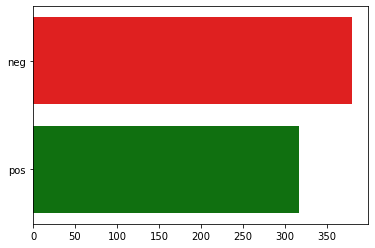

In [718]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df3_messages, 
             palette=['red',"green"],
             )
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)

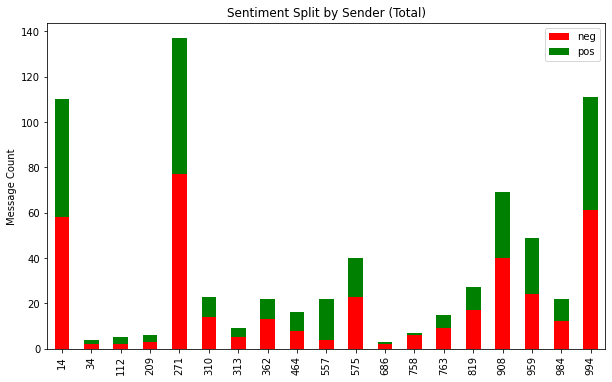

In [729]:
sent_count_sender_flair = df3_messages.reset_index().groupby(["sender_randint","sentiment"]).count().sort_values(ascending = True,by=["sender_randint","sentiment","index",])["index"]

sent_count_sender_flair.unstack().plot(kind='bar'
                    , stacked=True
                    , color=['red', 'green']
                    , figsize = (10,6)
                    , title = 'Sentiment Split by Sender (Total)'
            )

plt.xlabel('')
plt.ylabel('Message Count')
plt.legend(bbox_to_anchor=(1,1))

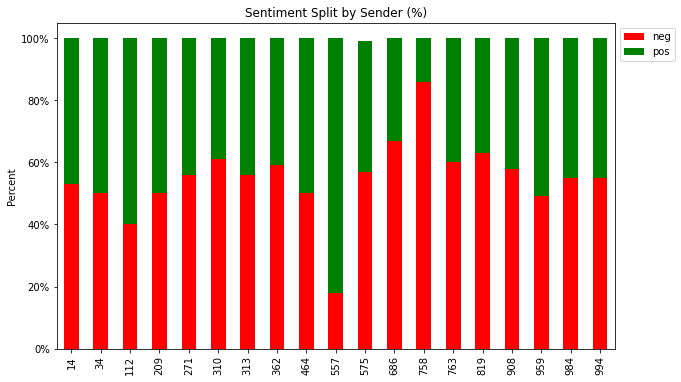

In [730]:
senetiment_split_perc_flair = df3_messages.reset_index().groupby(["sender_randint","sentiment"]).count().sort_values(ascending = True,by=["sender_randint","sentiment","index",])["index"]
# test_2['total'] = test_2.groupby("Sender").sum()
senetiment_split_perc_flair = pd.DataFrame(data = senetiment_split_perc_flair, columns = ['index'])
senetiment_split_perc_flair.rename(columns = {"index": "message_count"}, inplace = True)
senetiment_split_perc_2_flair = senetiment_split_perc_flair.groupby('sender_randint').sum('message_count')
senetiment_split_perc_2_flair = senetiment_split_perc_flair.merge(senetiment_split_perc_2_flair, how = 'left', left_index = True, right_index = True)
senetiment_split_perc_2_flair.rename(columns = {"message_count_x": "message_count"
                        ,"message_count_y": "total_messages"}, inplace = True)
senetiment_split_perc_2_flair['%_of_total'] = round(senetiment_split_perc_2_flair['message_count'] *1.0/ senetiment_split_perc_2_flair['total_messages'],2)
senetiment_split_perc_2_flair.head(3)

senetiment_split_perc_2_flair.unstack().plot(kind='bar'
                    ,stacked = True
                    , color=['red','green']
                    , figsize = (10,6)
                    , y = "%_of_total"  
                    , title = "Sentiment Split by Sender (%)"
            )

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.ylabel('Percent')
plt.xlabel(xlabel = None)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Looking at messages with >80% Flair prediction value

In [715]:
print(len(df3_messages[df3_messages['pred_value'] > .80]))
print(len(df3_messages))

577
697


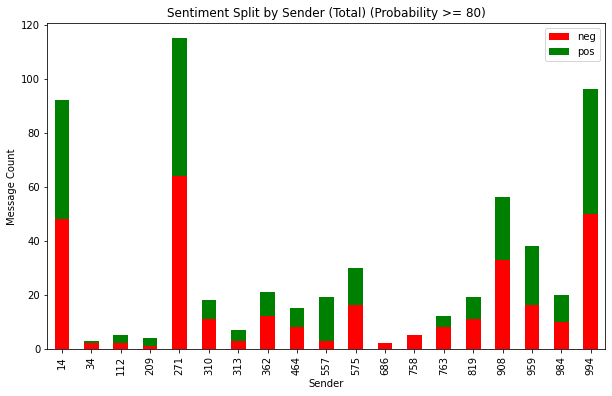

In [731]:
df3_messages_pred_80 = df3_messages[df3_messages['pred_value'] > .80]

sent_count_sender_flair_80 = df3_messages_pred_80.reset_index().groupby(["sender_randint","sentiment"]).count().sort_values(ascending = True,by=["sender_randint","sentiment","index",])["index"]

sentiment_split_perc_flair_80 = df3_messages_pred_80.reset_index().groupby(["sender_randint","sentiment"]).count().sort_values(ascending = True,by=["sender_randint","sentiment","index",])["index"]
# test_2['total'] = test_2.groupby("Sender").sum()
sentiment_split_perc_flair_80 = pd.DataFrame(data = sentiment_split_perc_flair_80, columns = ['index'])
sentiment_split_perc_flair_80.rename(columns = {"index": "message_count"}, inplace = True)
sentiment_split_perc_2_flair_80 = sentiment_split_perc_flair_80.groupby('sender_randint').sum('message_count')
sentiment_split_perc_2_flair_80 = sentiment_split_perc_flair_80.merge(sentiment_split_perc_2_flair_80, how = 'left', left_index = True, right_index = True)
sentiment_split_perc_2_flair_80.rename(columns = {"message_count_x": "message_count"
                        ,"message_count_y": "total_messages"}, inplace = True)
sentiment_split_perc_2_flair_80['%_of_total'] = round(sentiment_split_perc_2_flair_80['message_count'] *1.0/ sentiment_split_perc_2_flair_80['total_messages'],2)

sent_count_sender_flair_80.unstack().plot(kind='bar'
                    , stacked=True
                    , color=['red', 'green']
                    , figsize = (10,6)
                    , title = 'Sentiment Split by Sender (Total) (Probability >= 80)'
            )

plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.legend(bbox_to_anchor=(1,1))

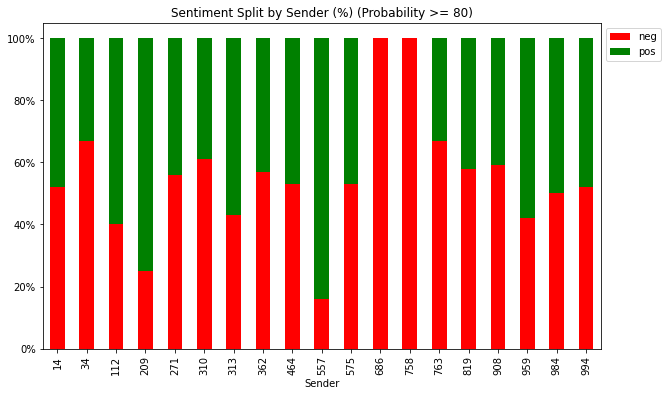

In [732]:
sentiment_split_perc_2_flair_80.unstack().plot(kind='bar'
                    ,stacked = True
                    , color=['red', 'green']
                    , figsize = (10,6)
                    , y = "%_of_total"  
                    , title = "Sentiment Split by Sender (%) (Probability >= 80)"
            )

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.ylabel(ylabel = None)
plt.xlabel(xlabel = 'Sender')
plt.legend(bbox_to_anchor=(1,1))
plt.show()